In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 크롤링
from bs4 import BeautifulSoup
from selenium import webdriver
import time, sys

# 시각화 맵
import folium

# Label encoder
from sklearn.preprocessing import LabelEncoder

# dtclf
from sklearn.tree import DecisionTreeClassifier
finan_dtclf = DecisionTreeClassifier()

from sklearn.preprocessing import Binarizer

from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score



In [81]:
df_t = sns.load_dataset('titanic')

df_t.drop(columns=['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], inplace=True)

# age_new 컬럼 생성.
df_t.loc[df_t.age >= 50, "age_new"] = "old"
df_t.loc[(df_t.age < 50) & (df_t.age>=10), "age_new"] = "young"
df_t.loc[df_t.age < 10, "age_new"] = "baby"

for column in ['sex', 'embarked', 'age_new'] :
    datas = df_t[column].unique()
    for i, d in enumerate(datas) :
        df_t[column].replace(d, i, inplace=True)
        
for i in ['sex', 'embarked'] : 
    encoder = LabelEncoder()
    encoder.fit(df_t[i])
    df_t[i] = encoder.transform(df_t[i])
    
for i in ['sex', 'embarked', 'age_new']:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df_t[i])
    df_t[i] = globals()[f'df1_{i}_encoder'].transform(df_t[i])
    
# 타이타닉 데이터 전처리

df_t = sns.load_dataset('titanic')
df_t.drop(columns=['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], inplace=True)

# 연령의 결측치 해결
age_md = df_t.groupby(['pclass', 'sex']).age.agg(['median'])
df_t.loc[(df_t['sex'] == 'male') & (df_t['pclass'] == 1) & (df_t.age.isna()), "age"] = age_md.loc[1, 'male'][0]
df_t.loc[(df_t['sex'] == 'male') & (df_t['pclass'] == 2) & (df_t.age.isna()), "age"] = age_md.loc[2, 'male'][0]
df_t.loc[(df_t['sex'] == 'male') & (df_t['pclass'] == 3) & (df_t.age.isna()), "age"] = age_md.loc[3, 'male'][0]
df_t.loc[(df_t['sex'] == 'female') & (df_t['pclass'] == 1) & (df_t.age.isna()), "age"] = age_md.loc[1, 'female'][0]
df_t.loc[(df_t['sex'] == 'female') & (df_t['pclass'] == 2) & (df_t.age.isna()), "age"] = age_md.loc[2, 'female'][0]
df_t.loc[(df_t['sex'] == 'female') & (df_t['pclass'] == 3) & (df_t.age.isna()), "age"] = age_md.loc[3, 'female'][0]

# embarked 결측치 해결
df_t.embarked.fillna(df_t.embarked.unique()[0], inplace=True)

# 연령층 별 컬럼 생성.
df_t.loc[df_t.age >= 50, "age_new"] = "old"
df_t.loc[(df_t.age < 50) & (df_t.age>=10), "age_new"] = "young"
df_t.loc[df_t.age < 10, "age_new"] = "baby"

# 불필요 컬럼 제거
df_t.drop(columns=['deck', 'sibsp', 'parch', 'age', 'embarked'], inplace=True)

# df_t.info()
# sex, embarked, age_new 해결해야함

# Labeling으로 문자형 데이터를 숫자형으로 변환
for i in ['sex', 'survived', 'age_new']:
    globals()[f'df_t{i}_encoder'] = LabelEncoder()
    globals()[f'df_t{i}_encoder'].fit(df_t[i])
    df_t[i] = globals()[f'df_t{i}_encoder'].transform(df_t[i])

# 타이타닉 머신러닝 예측 학습

# 머신러닝이 목적으로 할 데이터를 설정
X = df_t.drop(columns='survived')
y = df_t['survived']

from sklearn.tree import DecisionTreeClassifier
finan_dtclf_2 = DecisionTreeClassifier()

# fit = 머신러닝의 학습의 의미
finan_dtclf_2.fit(X, y)
# 분석-decision tree classification

# 새로운 타이타닉 데이터 전처리 

df_test = pd.read_csv('./test.csv')

# df_test.info()
# Name, Sex, Ticket, Cabin, Embarked 해결 필요

# 연령의 결측치 해결
# fare 결측치 해결
age_md = df_test.groupby(['Pclass', 'Sex']).Age.agg(['median'])
fare_md = df_test.groupby(['Pclass', 'Sex']).Fare.agg(['median'])
for i in ['male', 'female'] : 
    for y in range(1, 4) : 
        f"df_test.loc[(df_test['Sex'] == '{i}') & (df_test['Pclass'] == {y}) & (df_test.Age.isna()), 'Age'] = age_md.loc[{y}, '{i}'][0]"
        f"df_test.loc[(df_test['Sex'] == '{i}') & (df_test['Pclass'] == {y}) & (df_test.Fare.isna()), 'Fare'] = fare_md.loc[{y}, '{i}'][0]"
        

# 결측치가 너무 많은 데이터, 컬럼 삭제
df_test.drop(columns=['Cabin'], inplace=True)

# age_new 생성
df_test.loc[df_test.Age >= 50, "age_new"] = "old"
df_test.loc[(df_test.Age < 50) & (df_test.Age>=10), "age_new"] = "young"
df_test.loc[df_test.Age < 10, "age_new"] = "baby"

# 필요 없는 데이터 제거
df_test.drop(columns=['Name', 'Ticket', 'PassengerId', "SibSp", "Parch", 'Age', 'Embarked'], inplace=True)


# 컬럼 소문자로 변경 
l1 = []
for i in list(df_test.columns):
    l1.append(i.lower())
df_test.set_axis(l1, axis='columns', inplace=True)

# Index(['pclass', 'sex', 'age', 'fare', 'embarked', 'predict survived'], dtype='object')
# Labeling으로 문자형 데이터를 숫자형으로 변환
for i in ['sex', 'age_new']:
    globals()[f'df_test{i}_encoder'] = LabelEncoder()
    globals()[f'df_test{i}_encoder'].fit(df_test[i])
    df_test[i] = globals()[f'df_test{i}_encoder'].transform(df_test[i])

# fare 결측치 해결    
df_test['fare'].fillna(df_test['fare'].mean(), inplace=True)
# df_test[df_test['fare'].isna() == True] 

# 학습 데이터 70%, 테스트 데이터 30%

from sklearn.model_selection import train_test_split

X = df_t.drop('survived', axis=1)
y = df_t.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
# 직접구현
# X_train = df_t.iloc[:round(891 * 0.7), 1:]
# X_test = df_t.iloc[round(891 * 0.3), 1:]
# y_train = df_t.iloc[:round(891 * 0.7), 0]
# y_test = df_t.iloc[round(891 * 0.3), 0]

# np.random.shuffle
dtclf = DecisionTreeClassifier(ccp_alpha=0.0) #ccp : 분기점
dtclf.fit(X_train, y_train)
# predict이 필요한 이유 : 정답이 없는 경우가 있기 때문.
dt_pred = dtclf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_pred)
print('DecisionTree 정확도: %.2f' % accuracy_score(y_test, dt_pred))
# DecisionTree 정확도: 0.81

print('DecisionTree 정확도: %.2f' % dtclf.score(X_test, y_test))
# DecisionTree 정확도: 0.81

DecisionTree 정확도: 0.81
DecisionTree 정확도: 0.81


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

def get_clf_eval(y_test, pred) :
#     print("-" * 5)
#     print("오차 행렬\n",confusion_matrix(y_test, pred))
#     print("정확도 : %.2f" %accuracy_score(y_test, pred))
#     print("정밀도 : %.2f" %precision_score(y_test, pred))
#     print("재현율 : %.2f" %recall_score(y_test, pred))
#     print("f1 Score : %.2f" %f1_score(y_test, pred))
#     print("AUC : %.2f" % roc_auc_score(y_test, pred))
#     print("-" * 5)
    return accuracy_score(y_test, pred), precision_score(y_test, pred),recall_score(y_test, pred), f1_score(y_test, pred), roc_auc_score(y_test, pred) 

from sklearn.metrics import f1_score
def get_eval_by_threshold(y_test, pred_proba) :
    accuracy = []
    precision = []
    recall = []
    thr_list = []
    f1_list = []
    auc_list= []

    thr = 0
    while thr <= 1 :
        b = Binarizer(threshold=thr)
        custom_predict = b.fit_transform(pred_proba)[:, 1]
        get_clf_eval(y_test, custom_predict)
        thr += 0.1

        thr_list.append(thr)
        accuracy.append(get_clf_eval(y_test, custom_predict)[0])
        precision.append(get_clf_eval(y_test, custom_predict)[1])
        recall.append(get_clf_eval(y_test, custom_predict)[2])
        f1_list.append(get_clf_eval(y_test, custom_predict)[3])
        auc_list.append(get_clf_eval(y_test, custom_predict)[4])
    ts_datas={}
    ts_datas['thresholds'] = thr_list
    ts_datas["accuracy"] = accuracy
    ts_datas['precision'] = precision
    ts_datas['recall'] = recall
    ts_datas['f1Score'] = f1_list
    ts_datas['AUC'] = auc_list
    
    pd.DataFrame(ts_datas).set_index("thresholds").plot()
    
    plt.show()

In [203]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_test, y_test)
dt_pred = dtclf.predict(X_test)
get_clf_eval(y_test, dt_pred)

-----
오차 행렬
 [[55  0]
 [ 5 30]]
정확도 : 0.94
정밀도 : 1.00
재현율 : 0.86
-----


In [235]:
dtclf = DecisionTreeClassifier(max_depth=4)
dtclf.fit(X_train, y_train)
dt_pred = dtclf.predict(X_test)
get_clf_eval(y_test, dt_pred)

-----
오차 행렬
 [[45 10]
 [10 25]]
정확도 : 0.78
정밀도 : 0.71
재현율 : 0.71
-----


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


(0.7777777777777778, 0.7142857142857143, 0.7142857142857143)

In [159]:
# 새로운 타이타닉 데이터 생존 여부 예측
pred_result = finan_dtclf_2.predict(df_test)
pred_result_2 =  df_tsurvived_encoder.inverse_transform(pred_result)
df_test['pr_survived'] = pred_result_2

In [243]:
# 새로운 타이타닉 데이터 생존 여부 예측
pred = dtclf.predict(X_test)
pred_proba = dtclf.predict_proba(X_test)[:, 1]
len(dtclf.predict(X_test))
p_pp_df = pd.DataFrame([pred, pred_proba]).T
p_pp_df.columns = ['pred', 'pred_proba']
p_pp_df.head(20)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,pred,pred_proba
0,0.0,0.166316
1,0.0,0.166316
2,0.0,0.166316
3,0.0,0.166316
4,0.0,0.166316
5,0.0,0.166316
6,1.0,0.754864
7,1.0,0.754864
8,0.0,0.166316
9,0.0,0.166316


In [171]:
# 1.1보다 같거나 작으면 0, 크면 1을 반환.
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0], 
    [0, 1.1, 1.2]]

b = Binarizer(threshold=1.1)
b.transform(X_train)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


array([[1., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 1.],
       [1., 0., 1., 1.],
       [1., 0., 1., 1.]])

In [239]:
dtclf.predict_proba(X_train)[:, 1]

array([0.16631579, 0.75486381, 0.75486381, 0.75486381, 0.16631579,
       0.16631579, 0.75486381, 0.62962963, 0.75486381, 0.62962963,
       0.59259259, 0.16631579, 0.75486381, 0.16631579, 0.59259259,
       0.16631579, 0.16631579, 0.16631579, 0.75486381, 0.75486381,
       0.75486381, 0.75486381, 0.75486381, 0.75486381, 0.62962963,
       0.75486381, 0.75486381, 0.16631579, 0.59259259, 0.16631579,
       0.16631579, 0.16631579, 0.59259259, 0.16631579, 0.75486381,
       0.16631579, 0.16631579, 0.75486381, 0.75486381, 0.75486381,
       0.16631579, 0.75486381, 0.16631579, 0.75486381, 0.16631579,
       0.75486381, 0.06666667, 0.75486381, 0.62962963, 0.16631579,
       0.75486381, 0.75486381, 0.16631579, 0.16631579, 0.75486381,
       0.75486381, 0.16631579, 0.75486381, 0.16631579, 0.16631579,
       0.16631579, 0.75486381, 0.16631579, 0.75486381, 0.16631579,
       0.75486381, 0.16631579, 0.16631579, 0.75486381, 0.16631579,
       0.16631579, 0.16631579, 0.16631579, 0.16631579, 0.75486

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_cl

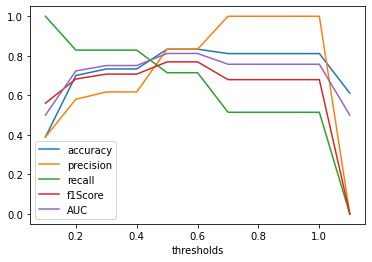

In [92]:
dtclf = DecisionTreeClassifier(max_depth=4, ccp_alpha=0.01)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba)

In [96]:
y_test

456    0
351    0
173    0
671    0
836    0
      ..
193    1
299    1
320    0
528    0
831    1
Name: survived, Length: 90, dtype: int64

7
임곗값 배열의 index: [0 1 2 3 4 5 6]
전체 임곗값: [1.94 0.94 0.9  0.59 0.35 0.12 0.1 ]
전체 임곗값별 FPR: [0.    0.    0.    0.091 0.327 0.382 1.   ]
전체 임곗값별 TPR: [0.    0.429 0.514 0.714 0.829 0.829 1.   ]


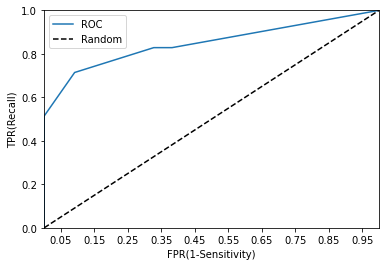

In [99]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_prob_class1 = dtclf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_prob_class1)
print(thresholds.shape[0])

# 반환된 임곗값 배열 로우가 47건 추출
thr_index = np.arange(0, thresholds.shape[0])
print('임곗값 배열의 index:', thr_index)
print('전체 임곗값:', np.round(thresholds[thr_index], 2))

# 추출된 임곗값에 따른 FPR, TPR 값
print('전체 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('전체 임곗값별 TPR:', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_prob_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_prob_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y측 명 설정 등
    start, end = plt.xlim();
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
roc_curve_plot(y_test, pred_proba[:,1])

Feature improtanes : [0.112 0.39  0.426 0.072]
pclass : 0.112
sex : 0.390
fare : 0.426
age_new : 0.072


<AxesSubplot:xlabel='importance', ylabel='feature'>

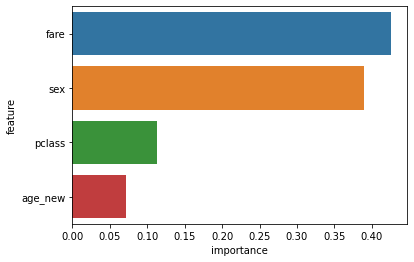

In [75]:
# feature importance 추출
print("Feature improtanes : {0}".format(np.round(dtclf.feature_importances_, 3)))

# feature impotance 매핑
for name, value, in zip(df_test.columns, dtclf.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))

feature_importance = pd.DataFrame({
    'feature': df_test.columns,
    'importance': dtclf.feature_importances_
})

# feature_importance['importance'].sort_values()
# 위의 방식은 inplace=True를 적으면 오류가 난다.
feature_importance.sort_values('importance', inplace=True, ascending=False)

# drop=True를 안적으면 위의 index가 column으로 추가되게 된다.
feature_importance.reset_index(drop=True, inplace=True)

# 시각화
sns.barplot(data=feature_importance, y="feature", x="importance")


Feature importanes:
[0.112 0.39  0.426 0.072]
pclass : 0.112
sex : 0.390
fare : 0.426
age_new : 0.072


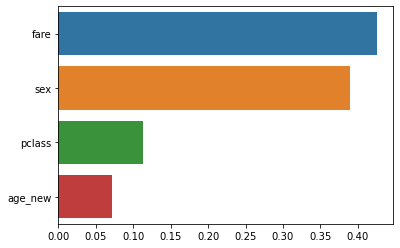

In [76]:
# feature importance 추출
print("Feature importanes:\n{0}".format(np.round(dtclf.feature_importances_, 3)))
# feature별 importance 매핑
f_i1 = {}
f_i2 = {}
for name, value in zip(X.columns, dtclf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    f_i1[name] = value
result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)
for i, j in result1:
    f_i2[i] = j
# feature importance를 column 별로 시각화하기
sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()))
plt.show()

In [77]:
import numpy as np
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow',
               edgecolor='k', clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('on')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),
                         np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_992/2311863821.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_992/2311863821.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/var

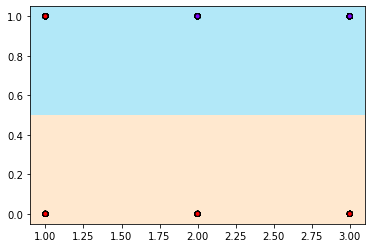

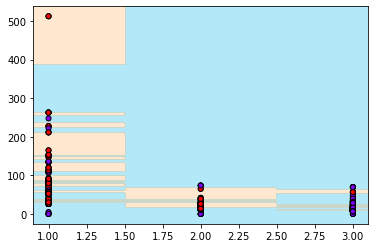

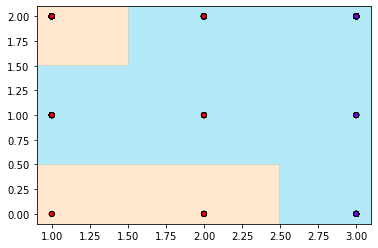

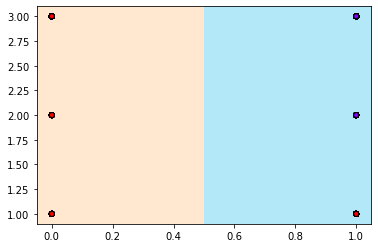

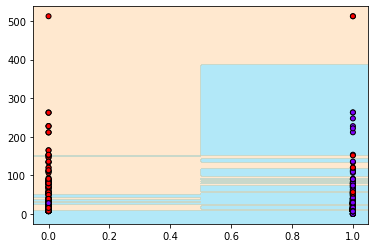

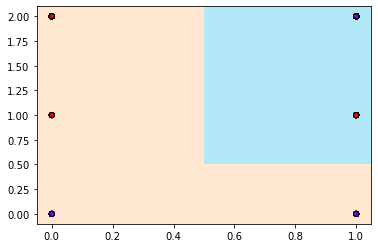

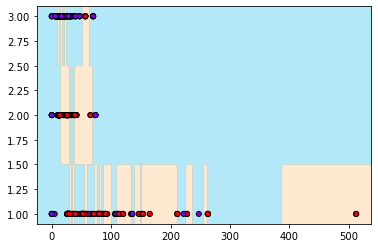

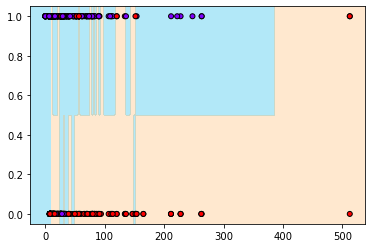

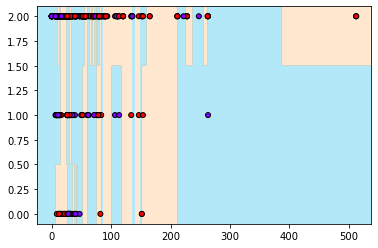

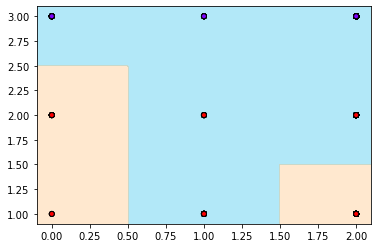

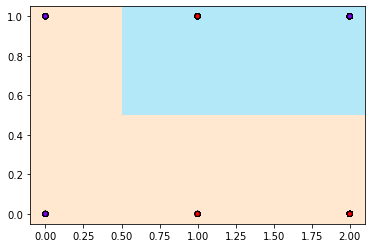

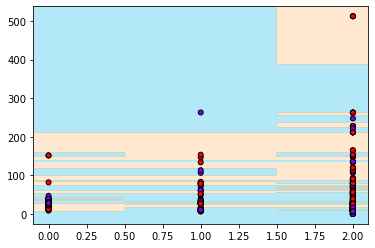

In [85]:
for i in X_train.columns:
    for j in X_train.columns:
        if i != j :
            visualize_boundary(dtclf, X_train[[i,j]], y_train)
        else:
             pass

,pclass,sex,fare,age_new
715,3,1,7.6500,2
319,1,0,134.5000,2
829,1,0,80.0000,1
79,3,0,12.4750,2
484,1,1,91.0792,2
...,...,...,...,...
241,3,0,15.5000,2
253,3,1,16.1000,2
390,1,1,120.0000,2
667,3,1,7.7750,2


In [69]:
feature_importance

,feature,importance
0,age_new,0.071970
1,pclass,0.112401
2,sex,0.389692
3,fare,0.425938
